In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [71]:
liver_data = pd.read_csv('../data/indian_liver_patient.csv')

In [72]:
liver_data.shape

(583, 11)

Convert gender variable to numeric code: 0 = female, 1 = male

In [79]:
# changing gender to 0, 1

liver_data['Gender'] = liver_data['Gender'].astype('category')
liver_data['Gender'] = liver_data['Gender'].cat.codes

# converting all variables to floats

liver_data = liver_data.astype('float')

# removing observations with missing data

liver_data = liver_data.dropna()

(579, 11)

In [80]:
X = np.array(liver_data)[:, 0:10]

y = np.array(liver_data)[:, 10].reshape(X.shape[0],1) - 1

Implement optimization algorithm for binary classification of liver dieseae (1:+/ 0:-)

In [101]:
def sigmoid(X, c):
    return 1/(1+np.exp(X.dot(c)))


def logistic_obj(c, X, y):
    
    # c dx1 vector of weights
    # X nxd matrix of data values
    # y nx1 vector of labels
    
    obj_value = (-1/X.shape[0]) * np.sum(y*np.log(sigmoid(X, c)) + (1 - y)*(1 - np.log(sigmoid(X, c))))
    
    
    return obj_value

def logistic_grad(c,X,y):
    
    return (1/X.shape[0]) * np.dot(X.T, sigmoid(X, c) - y)

def logistic_sgd(c,X,y):
    
    (n,d) = X.shape
    
    idx = np.random.randint(n)
    
    x = X[idx, :].reshape(1, d)
    
    z = np.dot(x.T, sigmoid(x, c) - y)

    return z.T

Initialize w, eta, iterations

[[ -1649.51702073]
 [   -27.88912781]
 [  -149.43938169]
 [   -69.0512513 ]
 [-11422.37736615]
 [ -3573.77398964]
 [ -4939.34430052]
 [  -230.87432729]
 [  -109.32800345]
 [   -32.67833895]]


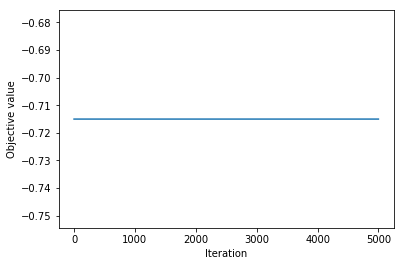

In [128]:
eta = 0.01

iterations = 5000

c = np.zeros((10,1))

# We will use the following vector to keep track of objective values
objective_values = np.zeros((iterations,1))

for i in range(iterations):
    
    c = c - eta * logistic_grad(c,X,y)
    
    # To do:  store current objective value
    objective_values[i] = logistic_obj(c, X, y)

# Plot the objective as a function of the iteration
plt.plot(objective_values)
plt.xlabel('Iteration')
plt.ylabel('Objective value')

print(c)